In [39]:
%pip install matplotlib
%pip install numpy
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
df=pd.read_excel('TCS_test_data.xlsx')
sales_data=df[['Quarterly','Net Profit']]
sales_data=pd.DataFrame(sales_data)
sales_data['Quarterly']=pd.to_datetime(sales_data['Quarterly'])
sales_data['Quarterly'] = pd.to_datetime(sales_data['Quarterly'], format='%Y-%m-%d')
print(sales_data.head())

   Quarterly  Net Profit
0 2013-12-01     4776.76
1 2014-03-01     4628.52
2 2014-06-01     5096.87
3 2014-09-01     4991.68
4 2014-12-01     5711.15


In [42]:
df1 = sales_data.set_index('Quarterly')
df1_reset = df1.reset_index()
df1_reset.columns = ['Quarterly', 'Net Profit']
print(df1_reset)
sales_data['Quarterly'] = pd.to_datetime(sales_data['Quarterly'])  
df1 = sales_data.set_index('Quarterly')
numeric_cols = df1.select_dtypes(include=['number'])
quarterly_sales = numeric_cols.resample('QE').mean()
print(df1.head())
print(df1.info())  # Ensure "Quarterly" is recognized as DateTime


    Quarterly  Net Profit
0  2013-12-01     4776.76
1  2014-03-01     4628.52
2  2014-06-01     5096.87
3  2014-09-01     4991.68
4  2014-12-01     5711.15
5  2015-03-01     3457.26
6  2015-06-01     5633.00
7  2015-09-01     5723.00
8  2015-12-01     5991.00
9  2016-03-01     5728.00
10 2016-06-01     5778.00
11 2016-09-01     5958.00
12 2016-12-01     6084.00
13 2017-03-01     5833.00
14 2017-06-01     6670.00
15 2017-09-01     5746.00
16 2017-12-01     6069.00
17 2018-03-01     6756.00
18 2018-06-01     7136.00
19 2018-09-01     7620.00
20 2018-12-01     7486.00
21 2019-03-01     7823.00
22 2019-06-01     8714.00
23 2019-09-01     8636.00
24 2019-12-01     7683.00
25 2020-03-01     8227.00
26 2020-06-01     6096.00
27 2020-09-01     7448.00
28 2020-12-01     9242.00
29 2021-03-01     8174.00
30 2021-06-01     8281.00
31 2021-09-01    10152.00
32 2021-12-01     9959.00
33 2022-03-01     9795.00
34 2022-06-01     8588.00
35 2022-09-01    10059.00
36 2022-12-01    10659.00
37 2023-03-0

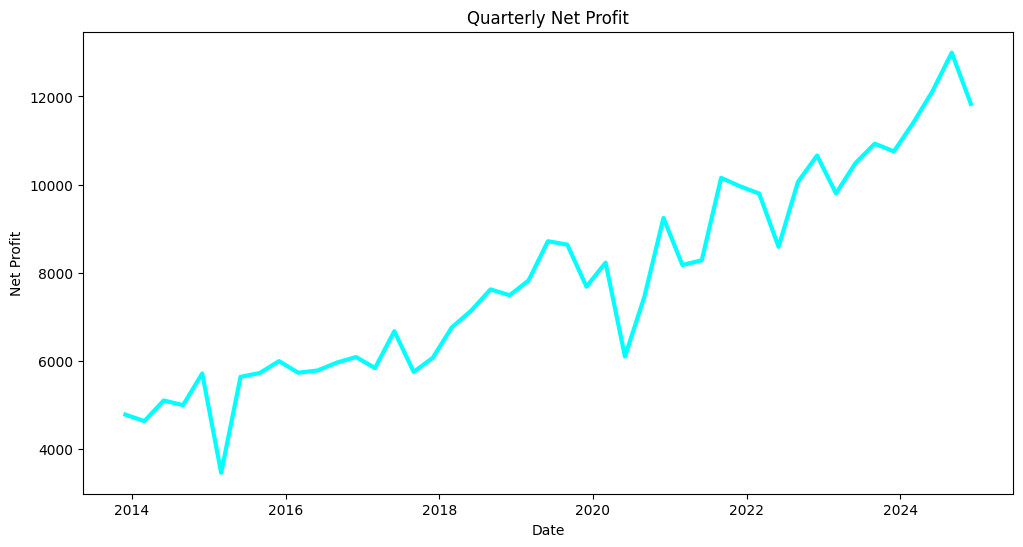

In [43]:
monthly_sales = sales_data.set_index('Quarterly')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Net Profit'], linewidth=3, c='cyan')
plt.title("Quarterly Net Profit")
plt.xlabel("Date")
plt.ylabel("Net Profit")
plt.show()  

In [44]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Net Profit'])

ADF Statistic: 1.7676379033161458
p-value: 0.9982826253367617
Non-Stationary


In [ ]:
monthly_sales['Net Profit Diff'] = monthly_sales['Net Profit'].diff()

# Drop the first NaN value caused by differencing
monthly_sales = monthly_sales.dropna()

# Re-check stationarity
check_stationarity(monthly_sales['Net Profit Diff'])

ADF Statistic: -7.6707650436481565
p-value: 1.5959511071629464e-11
Stationary


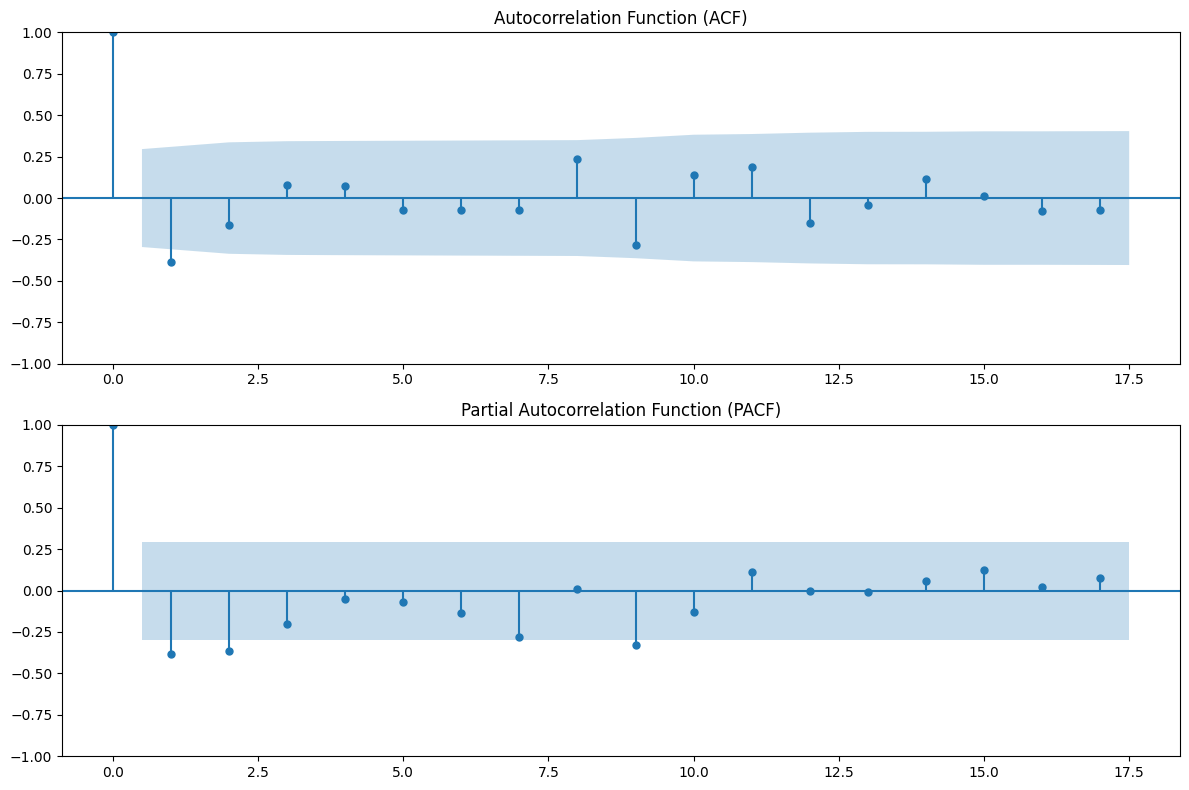

In [46]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop NA values after differencing
net_profit_diff = monthly_sales['Net Profit Diff'].dropna()

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(net_profit_diff, ax=axes[0])  # ACF Plot
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(net_profit_diff, ax=axes[1])  # PACF Plot
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Ensure `Net Profit` is a 1D Series
net_profit_series = monthly_sales['Net Profit']

# Fit the SARIMA model
model = SARIMAX(net_profit_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Print summary
print(results.summary())


c:\Users\rayya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                         Net Profit   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -255.767
Date:                            Mon, 24 Mar 2025   AIC                            521.535
Time:                                    14:50:20   BIC                            528.705
Sample:                                03-01-2014   HQIC                           523.872
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2893      0.257      1.125      0.261      -0.215       0.793
ma.L1         -0.9984      0.337   

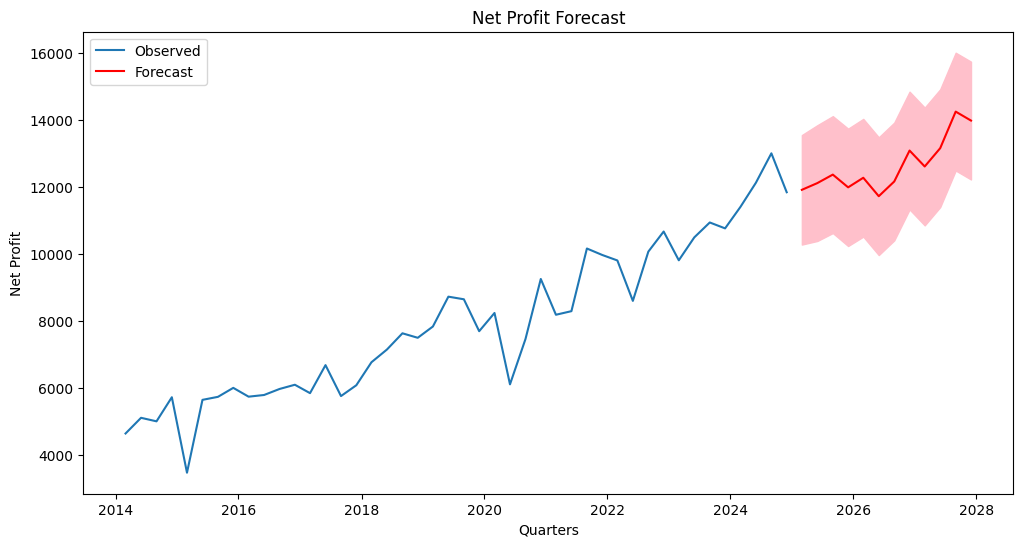

In [62]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["Net Profit"], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Net Profit Forecast")
plt.xlabel("Quarters")
plt.ylabel("Net Profit")
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract only 'Net Profit' for observed values
observed = monthly_sales['Net Profit'][-forecast_periods:]

# Compute MAE & MSE
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)

print(f'MAE: {mae}')
print(f'MSE: {mse}')


MAE: 1842.5395677768117
MSE: 3914780.319809638
